# '아디다스 제품 판매 정보'데이터 활용한 마케팅 활용 방안 분석
- 출처 : https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset?resource=download
- 사용 데이터 : 아디다스 제품 판매 정보 데이터
- 데이터 수 : 9652 rows × 14 columns

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
import warnings
warnings.filterwarnings("ignore")

## 1. 데이터셋 불러오기

In [59]:
adidas = pd.read_excel("./Adidas US Sales Datasets.xlsx")
adidas


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


## 2. 데이터 확인

In [60]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


### 2-1. 결측값 삭제

In [61]:
# 아무 정보 없는 Unnamed: 0 컬럼 삭제 
adidas.drop('Unnamed: 0',axis = 1, inplace = True)

In [62]:
# 결측값 확인
adidas[adidas.isnull().any(axis=1)]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# 결측값 삭제
adidas.dropna(axis=0, inplace=True)

In [64]:
adidas

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


- 첫행에 컬럼 이름이 들어있어 컬럼명으로 변경하고 삭제 진행

In [65]:
# 첫 번째 행을 컬럼 이름으로 설정
adidas.columns = adidas.iloc[0]

# 첫 번째 행 삭제
adidas = adidas[1:]

In [66]:
# 인덱스 정리
adidas.reset_index(drop=True, inplace=True)

In [67]:
adidas

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [68]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


### 2-2. 데이터 타입 변경

In [69]:
# 데이터 타입 변경
# int 변경
column = ['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']
adidas[column] = adidas[column].astype(int)

# float 변경
adidas['Operating Margin'] = adidas['Operating Margin'].astype(float)

# datetime 변경
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], format='%Y-%m-%d')

In [70]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 980.0+ KB


### 2-3. catagory형 컬럼 데이터 분포 확인

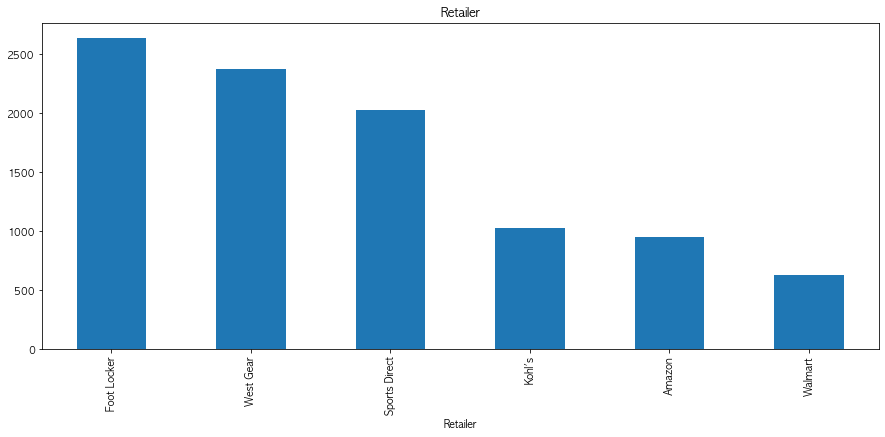

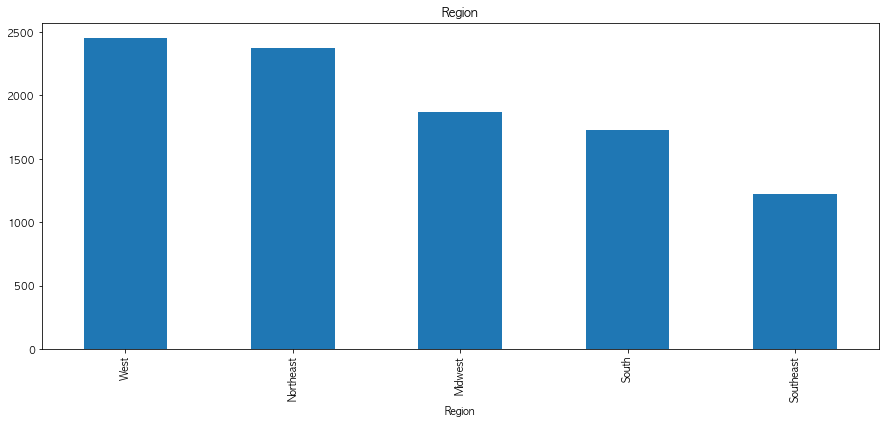

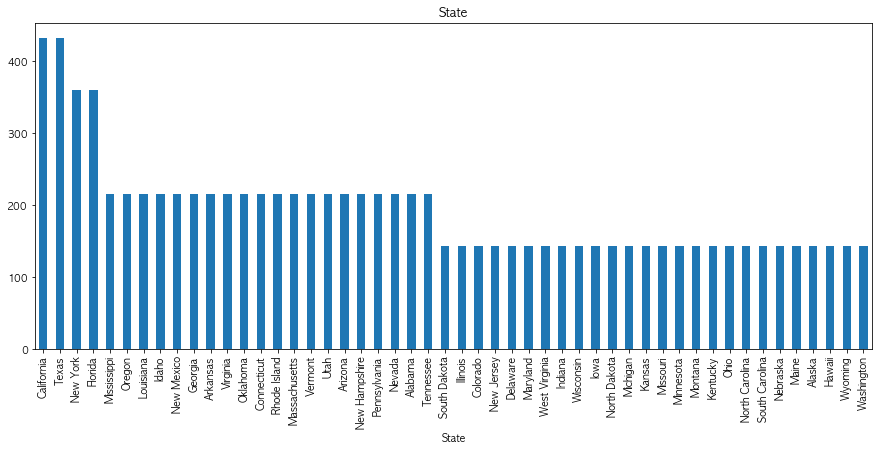

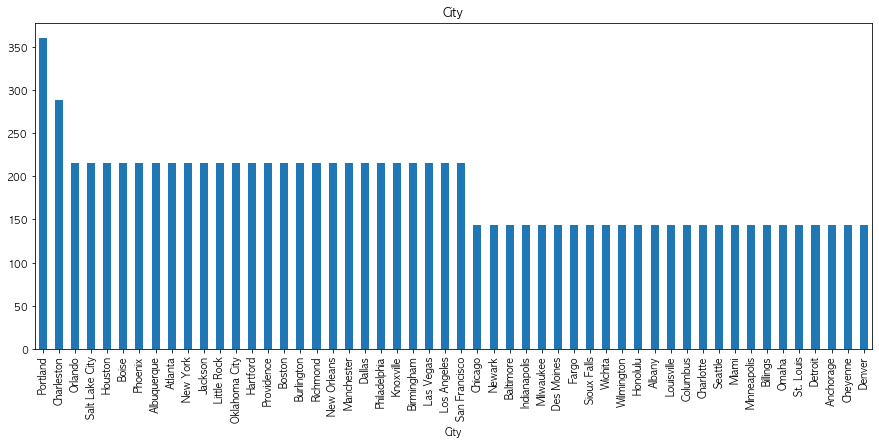

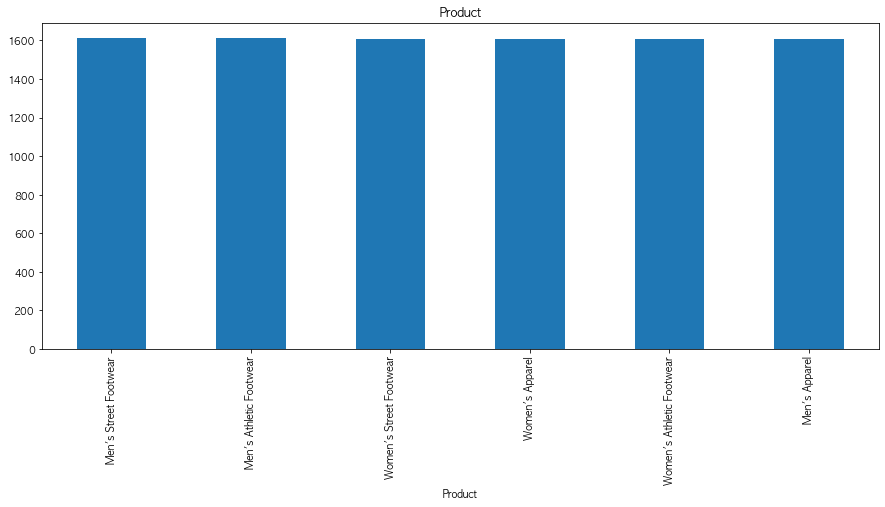

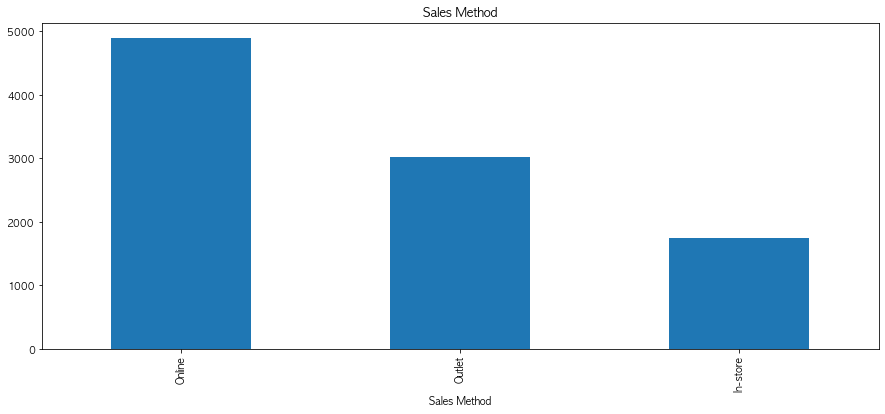

In [71]:
# catagory형 컬럼
cat_columns = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

# 각 컬럼에 대한 히스토그램
for column in cat_columns:
    plt.figure(figsize=(15, 6))
    adidas[column].value_counts().plot(kind='bar')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()

### 2-4. Total Sales 데이터 오류 발견 후 수정

- 예를 들면 첫 행에 50 * 1200이면 60000이 되어야 하는데 600000이 들어가 있음

In [72]:
adidas

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234,0.42,Outlet


In [73]:
adidas['Total Sales'] = adidas['Price per Unit'] * adidas['Units Sold']

In [74]:
adidas

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,60000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,50000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,40000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,38250,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,54000,162000,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234,0.42,Outlet


### 2-5. 상품과 관련된 분석

In [79]:
# 어떤 상품이 가장 많이 팔릴까?
adidas.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

Product
Men's Street Footwear        593320
Men's Athletic Footwear      435526
Women's Apparel              433827
Women's Street Footwear      392269
Women's Athletic Footwear    317236
Men's Apparel                306683
Name: Units Sold, dtype: int64

In [76]:
# 어떤 상품이 가장 판매 수익이 높을까?
adidas.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

Product
Men's Street Footwear        27637979
Women's Apparel              23841910
Men's Athletic Footwear      20573155
Women's Street Footwear      17193813
Men's Apparel                16497132
Women's Athletic Footwear    14305821
Name: Total Sales, dtype: int64

In [77]:
# 어떤 상품이 가장 이익이 높을까?
adidas.groupby('Product')['Operating Profit'].sum().sort_values(ascending=False)

Product
Men's Street Footwear        82801715
Women's Apparel              68650450
Men's Athletic Footwear      51846374
Women's Street Footwear      45095297
Men's Apparel                44762447
Women's Athletic Footwear    38975265
Name: Operating Profit, dtype: int64

In [78]:
# 어떤 상품이 가장 마진이 많이 남을까?
adidas.groupby('Product')['Operating Margin'].sum().sort_values(ascending=False)

Product
Men's Street Footwear        718.27
Women's Apparel              709.64
Women's Athletic Footwear    681.52
Men's Apparel                663.64
Women's Street Footwear      659.60
Men's Athletic Footwear      648.35
Name: Operating Margin, dtype: float64

- Men's Apparel은 Women's Street Footwear 에 비해 이익은 낮지만 마진은 높음
    - Men's Apparel은 Women's Street Footwear에 비해 비용 대비 순이익이 크다.

### 2-6. 소매점별 상품별 총판매액 비교

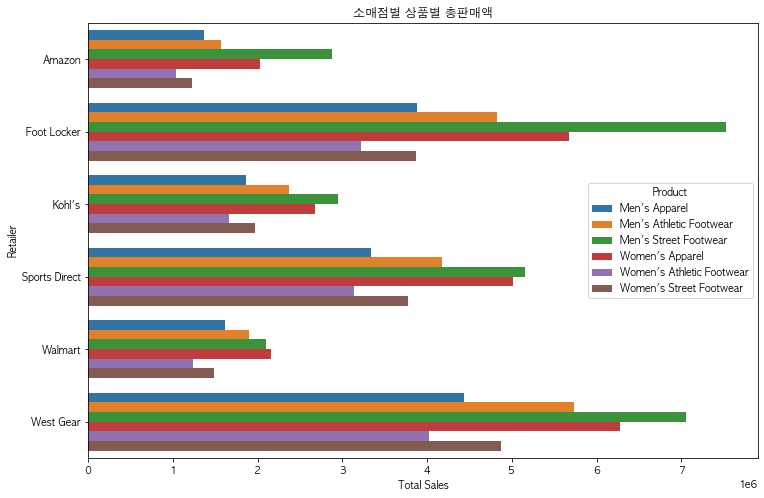

In [86]:
# 소매점별 상품별 총판매액 계산
retailer_product_sales = adidas.groupby(['Retailer', 'Product'])['Total Sales'].sum().reset_index()

# 히스토그램 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Sales', y='Retailer', hue='Product', data=retailer_product_sales, ci=None)
plt.title('소매점별 상품별 총판매액')
plt.xlabel('Total Sales')
plt.show()

- walmark를 제외한 모든 소매점에서는 men's street footwear가 1위

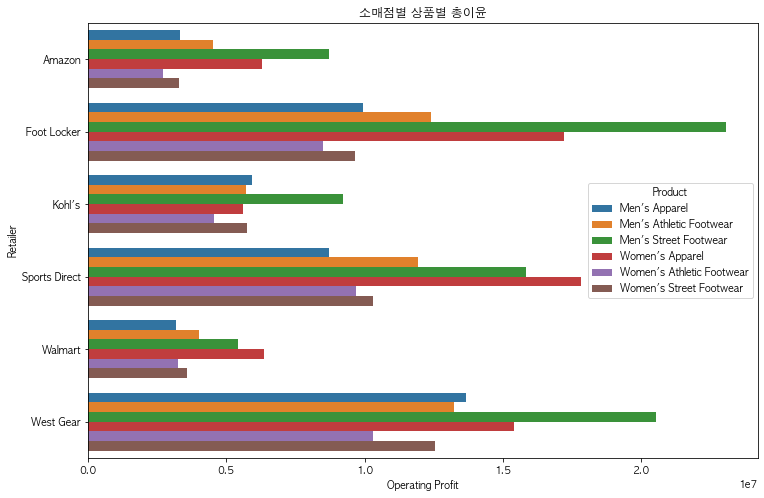

In [87]:
# 소매점별 상품별 총이윤 계산
retailer_product_sales = adidas.groupby(['Retailer', 'Product'])['Operating Profit'].sum().reset_index()

# 히스토그램 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='Operating Profit', y='Retailer', hue='Product', data=retailer_product_sales, ci=None)
plt.title('소매점별 상품별 총이윤')
plt.xlabel('Operating Profit')
plt.show()

Sport Direct 소매점에서는 총 매출은 men's street footwear가 젤 높으나 이익은 women's apparel이 더 높음
- Sport Direct에서는 men's street footwear 파는 것보다 women's apparel을 파는 게 더 좋은 선택

- 다음 주 분석 : Invoice Date 기준 월별로 나눠서 월별 매출 비교? 월별로 어떤 상품이 가장 이윤이 높을지 비교(분기별로 비교해보는 것도 고려)
                지역별 특징? 어떤 지역이 가장 많은 매출을 올리며 지역별로 온라인으로 구매가 많은지 오프라인으로 구매가 많은지 비교해보기